In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv ("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# upto here we are uploded "titanic dataset.csv" to jupyter notebook.
# and make df as a instance of our insurance dataset.

In [4]:
df.shape
# there are 891 rows and 12 columns are present in the data set.

(891, 12)

In [5]:
df.columns
# here we can see the name of each column present in the data set.

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.columns.unique()
# here we can se that the same result is occured, that means there there is not repetation of any column in the dataset.

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.columns.nunique()
# the total no. of cloumns are same as we can check earlier in df.shape

12

In [8]:
df.dtypes
# here can see that there are some different types of data is present in the given dataset like : [ int64, object, float64 ]

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
df.info()
#  here we can see that
# 1) total number for columns present : 12
# 2) total number of rows presnet : 891
# 3) total "data types present in data set" : 3 (i.e "object, int64 & float64")
#  out of which   2 columns of - float64
#                 5 column of - int64
#                 5 columns of - object
# 4)NULL VALUES are may present in our dataset.- "AGE", "CABIN" AND "EMBARKED", we have to chek further with other methods.
# 5) here we can also observe that thE data type of age "AGE" column is "float64", "age" could not be in DECIMALS,
#     so we have to change it from DECIMAL to INTEGER

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


CHECKING NULL VALUES ===================================================================================================================

In [11]:
df.isnull().sum()
# Here we can see the NULL VALUES present in the cloumn "AGE", "CABIN", & "EMBARKED"

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

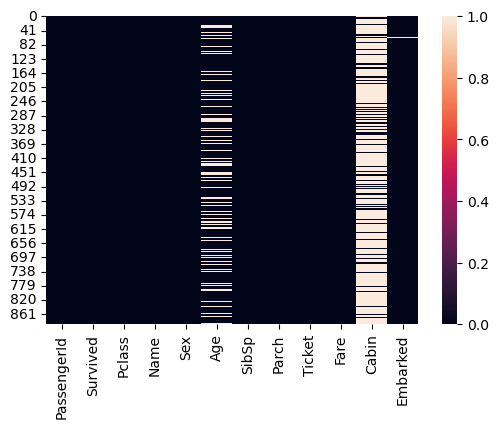

In [12]:
plt.figure(figsize=(6,4))
sns.heatmap(df.isnull())
# Here we can also check null values with the help of Heatmap

In [13]:
# Now after finding null values we have to replace it .

In [14]:
df['Embarked'].isnull().sum()
# here we find two NULL VALUES present in EMBARKED column
# the Emarked column is also a categorical column with "object" category
# and here we find only 2 null values are present so we can replace it with MODE
#  for this we have to import 'SIMPLE IMPUTER' library from SKLEARN

2

In [15]:
from sklearn.impute import SimpleImputer

In [16]:
imp = SimpleImputer(strategy="most_frequent")

In [17]:
df['Embarked']= imp.fit_transform(df['Embarked'].values.reshape(-1,1))
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [18]:
df['Embarked'].isnull().sum()

0

In [19]:
# Here we are successfully replaced the NAN VALUES of Embarked Column.

In [20]:
df['Age'].isnull().sum()
#  there are 177 NULL values are present in the age column.
# we can replace it with MEDIAN

177

In [23]:
imp = SimpleImputer(strategy="mean")

In [24]:
df['Age']= imp.fit_transform(df['Age'].values.reshape(-1,1))
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [25]:
df['Age'].isnull().sum()

0

In [26]:
# here Null  values present in Age Column is also removed succesfully.

In [27]:
df['Cabin'].isnull().sum()
# there are 687 NULL values are present in the 'cabin' column.
# Cabins are the numbers which are alloted to the customers , if there are any missing values in it,
# so did'nt change it with Mean because 'Mean' number cabin may not be present ,
# so we can replace it with MEDIAN

687

In [28]:
# Here we can see in the 'Cabin column'
#  out of Total entries (891), there (687) are NAN values are present
# so insted of repalcing, we can drop the 'cabin column'

In [29]:
df['Cabin'].dtypes
# Datatype is Object 

dtype('O')

In [30]:
df.shape

(891, 12)

In [31]:
# here we can see that in "CABIN COLUMN" out of 891 rows, 687 NAN VALUES are present , that means most of the data is absent
# if we can replace it with "MODE" technique , then 687 rows are having same data, which we dont know what it should be...
# so insted of replacing/deleting NAN VALUES we can drop this column from our dataset.

In [32]:
df.drop('Cabin', axis = 1, inplace=True)

In [33]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [34]:
# here we successfully drop the cabin cloumn

In [35]:
df.isnull().sum()
# Here as you can see we have successfully removed all the NAN VALUES from our DATASET 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:>

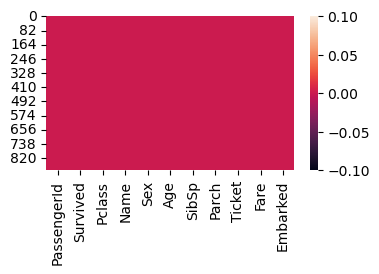

In [36]:
plt.figure(figsize=(4,2))
sns.heatmap(df.isnull())
# NOW NO NULL VALUES ARE PRESENT IN DATASET

CHECKING UNIQUE VALUES PRENSENT IN DATASET & UNIVARIATE ANALYSIS ========================================================================================================================

In [38]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [39]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [40]:
df.shape

(891, 11)

In [41]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [42]:
df['Survived'].nunique()

2

In [43]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Text(0, 0.5, 'No. Of Passengers Survived')

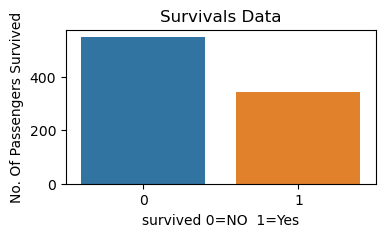

In [44]:
plt.figure (figsize = (4,2), facecolor = "white")
plt.title('Survivals Data')
sns.countplot(x='Survived', data = df)
plt.xlabel('survived 0=NO  1=Yes', fontsize=10)
# plt.xticks(rotation=30, ha = 'right')
plt.ylabel('No. Of Passengers Survived')
# plt.yticks(rotation=30, ha = 'right')

# Here we can see that the Number Of Survivals are Less as Compared to Deaths.

In [45]:
df['PassengerId'].nunique()
# Here as we can see that the number of "nunique" values present in dataset is 891, same as total number of rows present.
#  that means we can say that there is no repetation in "Passenger id" column.

891

In [46]:
df['Pclass'].nunique()
# The number of nunique values in "Pclass" column is only 3
# so we can say that it is a CATEGORICAL COLUMN

3

In [47]:
df['Pclass'].value_counts()
# And out of this "Pclass" (Passenger class) we found that , there are most of the passengers are from "3" class, then "1" & "2"

3    491
1    216
2    184
Name: Pclass, dtype: int64

Text(0, 0.5, 'No. of Passengers')

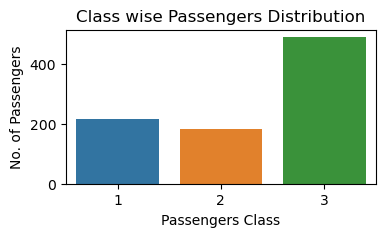

In [48]:
plt.figure (figsize = (4,2), facecolor = "white")
plt.title('Class wise Passengers Distribution')
sns.countplot(x='Pclass', data = df)
plt.xlabel('Passengers Class', fontsize=10)
# plt.xticks(rotation=30, ha = 'right')
plt.ylabel('No. of Passengers')
# plt.yticks(rotation=30, ha = 'right')

# here clearly we can see that majority of the passengrs are present in "class 3"
# and there is only slight differece between "class 2" & "class 1"

In [49]:
df['Name'].nunique()
#  similarly same for "name" column.

891

In [50]:
df['SibSp'].nunique()
# The number of nunique values in "SibSp" column is only 7
# so we can say that it is a CATEGORICAL COLUMN

7

In [51]:
df['SibSp'].value_counts()
# here we can see the "siblingcounts" , majority of "siblings count is 0 & 1"
#  then it goes further upto 5

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Text(0, 0.5, 'No. of Passengers')

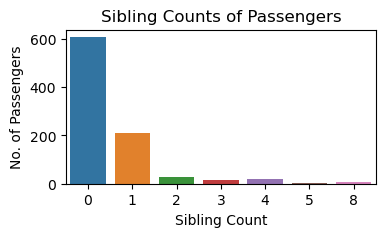

In [52]:
plt.figure (figsize = (4,2), facecolor = "white")
plt.title('Sibling Counts of Passengers')
sns.countplot(x='SibSp', data = df)
plt.xlabel('Sibling Count', fontsize=10)
# plt.xticks(rotation=30, ha = 'right')
plt.ylabel('No. of Passengers', fontsize=10)

# here clearly we can see the no. of siblings counts present "0" is maximum and then "1".
# few of the passengers are in "2,3,4,5,8" category

In [53]:
df['Parch'].nunique()
# The number of nunique values in "Parch" column is only 7
# so we can say that it is a CATEGORICAL COLUMN

7

In [54]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Text(0, 0.5, 'Count of Parent/chidren aboard')

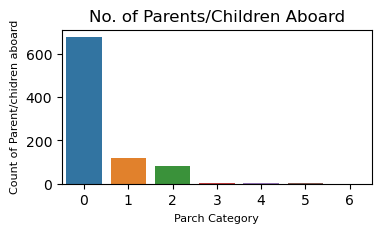

In [55]:
plt.figure(figsize=(4,2),facecolor="white")
plt.title ('No. of Parents/Children Aboard')
sns.countplot(x='Parch',data=df)
plt.xlabel('Parch Category', fontsize=8)
# plt.xticks(rotation=30, ha = 'right')
plt.ylabel('Count of Parent/chidren aboard', fontsize=8)
# plt.yticks(rotation=0, ha = 'right')

# here we can see that most of the Passengers are in "0 parch category" and some of with "1,2" & only few of them in "3,4,5,6" 

In [56]:
df['Ticket'].nunique()
# but here we can see the difference between no. of uniques present in "ticket" and Total no. of rows
#  but it is "ignoreble" because we know that there could be more then 1 passenger for a single ticket.
# so we can ignore this difference.

681

In [57]:
df['Embarked'].nunique()
# The number of nunique values in "Embarked" column is only 3
# so we can say that it is a CATEGORICAL COLUMN

3

In [58]:
df['Embarked'].value_counts()
# here we can find that the embarkment point of most of the passengers is "s"
#  then it goes on further deacrissing with "C" & "Q"

S    646
C    168
Q     77
Name: Embarked, dtype: int64

Text(0, 0.5, 'No. of Passengers')

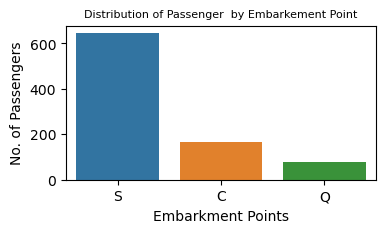

In [59]:
plt.figure(figsize=(4,2),facecolor="white")
plt.title('Distribution of Passenger  by Embarkement Point',fontsize=8)
sns.countplot(x='Embarked', data=df)
plt.xlabel('Embarkment Points',fontsize=10)
# plt.xticks(rotation=30, ha = 'right')
plt.ylabel('No. of Passengers',fontsize=10)
# plt.yticks(rotation=0, ha = 'right')

# here we find the distribution of Passengerss from Embarkment Point 'S= Southampton' 'C = Cherbourg' & 'Q = Queenstown'
# majority of the passengers are embarked on 's= Southampton' point
# (C = Cherbourg; Q = Queenstown; S = Southampton) 
# Here we finds that most of the passengers are from "S = Southampton port"

In [60]:
# So from the above analysis we found that, there may also NULL VALUES in some of the columns and
# The column are ==> "Pclass"  "sibsp"  "Parch"  "Embarked" is CATEGORICAL COLUMNS.

In [61]:
# UNIVARIATE ANALYSIS IS COMPLETED============================================================================================

BIVARIATE ANALYSIS ============================================================================================================

In [63]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [64]:
# 1) First we have to check how many passengers are survived from different Passenger classes

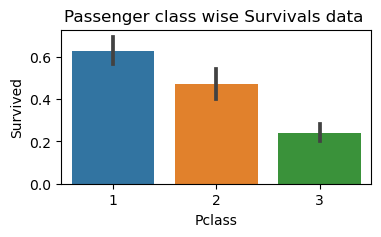

In [65]:
plt.figure (figsize = (4,2), facecolor = "white")
plt.title('Passenger class wise Survivals data ',fontsize=12)
sns.barplot (x = 'Pclass', y = 'Survived', data = df)
# plt.xticks(rotation=30, ha = 'right')
plt.show()

# here we can clearly see that the survials are only from "1 class"
#  because below '0.5 ' is not considerd as srvived

In [66]:
# 2) we have to check the survival rate in 'Male' & 'Female'

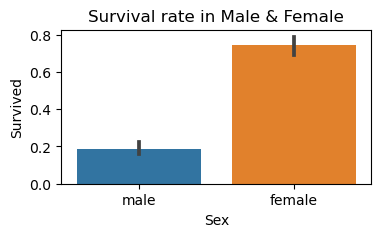

In [67]:
plt.figure (figsize = (4,2), facecolor = "white")
plt.title('Survival rate in Male & Female',fontsize=12)
sns.barplot (x = 'Sex', y = 'Survived', data = df)
# plt.xticks(rotation=30, ha = 'right')
plt.show()

# Survival Rate of Female's are verymuch Higher as compared to Male

In [68]:
# 3) Now we are checking age wise survival data.

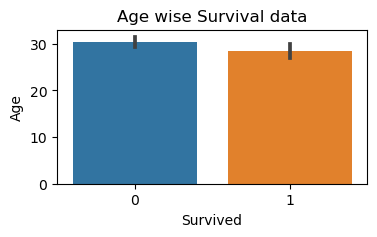

In [69]:
plt.figure (figsize = (4,2), facecolor = "white")
plt.title('Age wise Survival data',fontsize=12)
sns.barplot (x = 'Survived', y = 'Age', data = df)
# plt.xticks(rotation=30, ha = 'right')
plt.show()
# there is no such difference between this.

In [70]:
# 4) Cheking rate of survivals acoording to Embarkemnet Point.

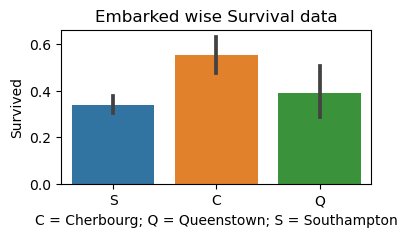

In [71]:
plt.figure (figsize = (4,2), facecolor = "white")
plt.title('Embarked wise Survival data',fontsize=12)
sns.barplot (x = 'Embarked', y = 'Survived', data = df)
plt.xlabel('C = Cherbourg; Q = Queenstown; S = Southampton')
# plt.xticks(rotation=30, ha = 'right')
plt.show()

# here we find that the survival rate is HIGHEST in 'C'= cherbourg > 'S'= Southampton > 'Q'= Queenstown


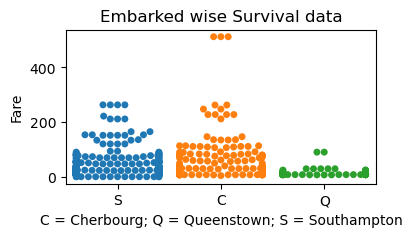

In [72]:
plt.figure (figsize = (4,2), facecolor = "white")
plt.title('Embarked wise Survival data',fontsize=12)
sns.swarmplot (x = 'Embarked', y = 'Fare', data = df)
plt.xlabel('C = Cherbourg; Q = Queenstown; S = Southampton')
# plt.xticks(rotation=30, ha = 'right')
plt.show()

# as in above graph we can see that the survival rate is higher of those passengers whose "Embarkement Point is 'C'= Cherbourg"
#  why is this ? because of their TICKET FAIR PRICES , clearly shown in below graph

In [73]:
# 5) Cheking rate of survivals acoording to Siblings Count.

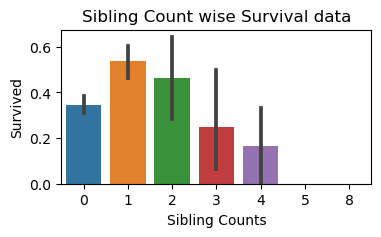

In [74]:
plt.figure (figsize = (4,2), facecolor = "white")
plt.title('Sibling Count wise Survival data',fontsize=12)
sns.barplot (x = 'SibSp', y = 'Survived', data = df)
plt.xlabel('Sibling Counts')
# plt.xticks(rotation=30, ha = 'right')
plt.show()

# here we find that the Highest Survival is with 'Sibling Count 1 & 2 only' 

In [76]:
# 6) Cheking rate of survivals acoording to TicketFair Prices.

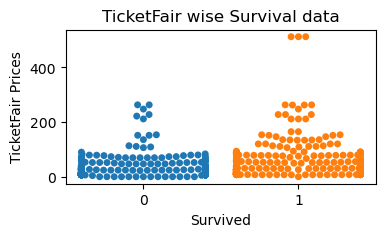

In [77]:
plt.figure (figsize = (4,2), facecolor = "white")
plt.title('TicketFair wise Survival data',fontsize=12)
sns.swarmplot (x = 'Survived', y = 'Fare', data = df)
plt.xlabel('Survived')
plt.ylabel('TicketFair Prices')
# plt.xticks(rotation=30, ha = 'right')
plt.show()

# Here we can clearly see that those passengers whose tickets Fair is very high,
# the possibility of surviving also high 

MULTIVARIATE ANALYSIS =======================================================================================================

In [79]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


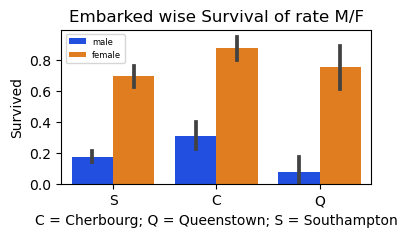

In [98]:
plt.figure (figsize = (4,2), facecolor = "white")
plt.title('Embarked wise Survival of rate M/F')
sns.barplot (x= 'Embarked', y = 'Survived', hue = 'Sex', data= df, palette = "bright")
# plt.xticks(rotation=30, ha = 'right')
plt.xlabel('C = Cherbourg; Q = Queenstown; S = Southampton')
plt.legend(loc= 'upper left', fontsize=6)
plt.show()

# Here we find that , from all of three Embarked Points the Survival of females are Higher as compared to Males

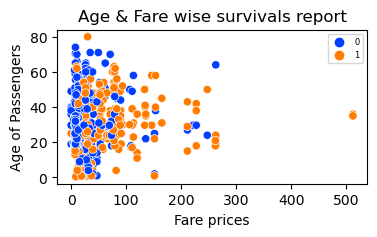

In [97]:
plt.figure (figsize = (4,2), facecolor = "white")
plt.title('Age & Fare wise survivals report')
sns.scatterplot (x= 'Fare', y = 'Age', hue = 'Survived', data= df, palette = "bright")
# plt.xticks(rotation=30, ha = 'right')
plt.xlabel('Fare prices')
plt.ylabel('Age of Passengers')
plt.legend(loc= 'upper right', fontsize=6)
plt.show()
# As in the above graph it is clear that Higher the Ticket Fair - Hgher the Survival chances

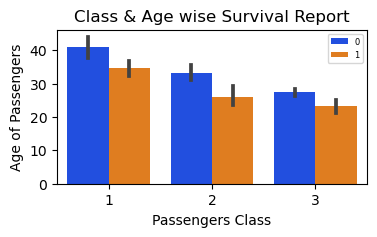

In [100]:
plt.figure (figsize = (4,2), facecolor = "white")
plt.title('Class & Age wise Survival Report')
sns.barplot (x= 'Pclass', y = 'Age', hue = 'Survived', data= df, palette = "bright")
# plt.xticks(rotation=30, ha = 'right')
plt.xlabel('Passengers Class')
plt.ylabel('Age of Passengers')
plt.legend(loc= 'upper right', fontsize=6)
plt.show()

# Here we find that , in every class Lower Age Passengers are more able to survive as compared to Higher Age Passengers

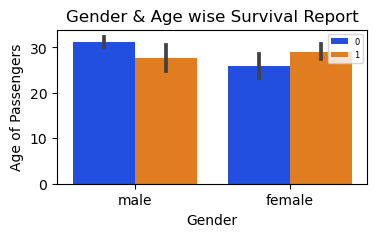

In [102]:
plt.figure (figsize = (4,2), facecolor = "white")
plt.title('Gender & Age wise Survival Report')
sns.barplot (x= 'Sex', y = 'Age', hue = 'Survived', data= df, palette = "bright")
# plt.xticks(rotation=30, ha = 'right')
plt.xlabel('Gender')
plt.ylabel('Age of Passengers')
plt.legend(loc= 'upper right', fontsize=6)
plt.show()

# Here we can find an intresting fact that: In MALE- Lower Age passengers are more able to survive as compared to Higher Age
#                                    But In Females- Higher Age passengers are more able to survive as compared to Lower Age

Text(39.225756172839496, 0.5, 'Ticket Prices')

<Figure size 1000x800 with 0 Axes>

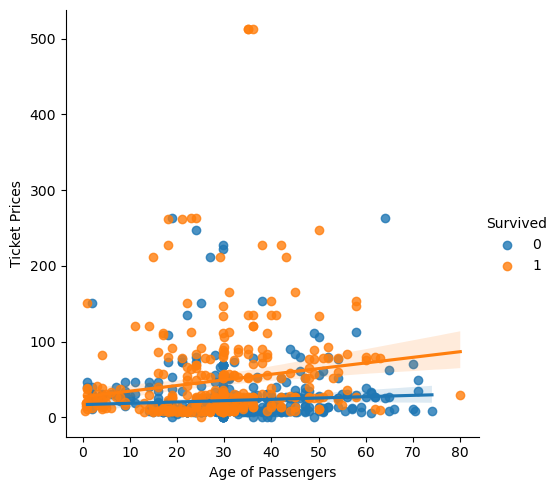

In [116]:
plt.figure(figsize=(10,8))
sns.lmplot('Age','Fare',hue='Survived',data=df)
plt.xlabel('Age of Passengers',fontsize=10)
plt.ylabel('Ticket Prices')

In [ ]:
# Most of the Higher Age Passengers are unable to survive only few of them are survived
# the Passengers who buy Higher Price Tickest are from Higher are Class & they are able to survive.

CHECKING FOR OUTLIERS ========================================================================================================

In [118]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# here as we can see in the above table, we see a huge difference between 75% & Max of some columns,"Age","SibSp","Parch","Fare"
#  due to which we can assume that there may presence of outliers, so we have to check this with "BOXPLOT METHOD"
# here above we also finds that "STANDARD DEVIATION" is very high in "P-id","Age","Fare". = very high SKEWNESS

In [119]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

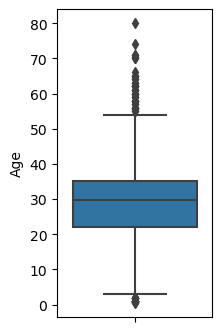

In [121]:
plt.figure (figsize = (2,4), facecolor = "white")
sns.boxplot(y='Age',data=df)
plt.show()
# here we can see the presence of Outliers

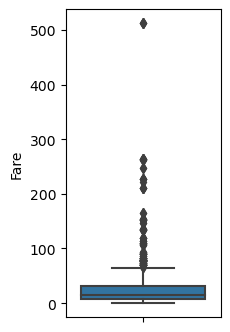

In [123]:
plt.figure (figsize = (2,4), facecolor = "white")
sns.boxplot(y='Fare',data=df)
plt.show()
# here in the "Fare Cloumn" also we can see the huge no. of outliers are present

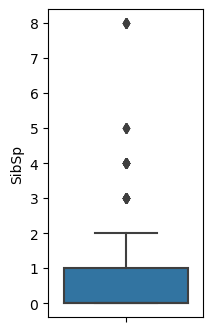

In [128]:
plt.figure (figsize = (2,4), facecolor = "white")
sns.boxplot(y='SibSp',data=df)
plt.show()
# here we can also seen the outliers in 'Siblings count'

In [136]:
#  Here Before removing outliers we have to change our "object" columns into "integers"

In [134]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [135]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [ ]:
# here some of the columns are having no such important relevance , so for better model we have to drop those columns.

In [137]:
df.drop('PassengerId', axis = 1, inplace=True)

In [140]:
df.drop('Name', axis = 1, inplace=True)

In [141]:
df.drop('Ticket', axis = 1, inplace=True)

In [142]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [143]:
df.shape
# here above we removed 3 columns from our Dataset , now from 11, 8 columns are remain

(891, 8)

In [145]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [ ]:
# Outof these 8 columns these are = Survived, Pclass, Age, Sibsp, Parch, Embarked    are categorical columns

In [146]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [ ]:
# here above 'sex' & 'Embarked' are object columns , so firstofall we have to have to change their data type.

ENCODING TECHNIQUES ===========================================================================================================

In [149]:
from sklearn.preprocessing import LabelEncoder

In [150]:
le = LabelEncoder()

In [152]:
df['Sex'] = le.fit_transform(df['Sex'])
df.head(5)

# Here below we can see that out 'Gender' column is converted into 0-1  from  Male-Female

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [153]:
df['Embarked'] = le.fit_transform(df['Embarked'])
df.head(5)
# similarly here Embarked also converted from S-C-Q to 2-0-1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [154]:
df.dtypes
# now here you can see 'Sex' & 'Embarked' columns type is changed from 'object' to 'int64'
# now we have two columns with 'float64' i.e 'Age' & 'Fare'

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

In [ ]:
#  Now we can apply Z-SCORE METHOD------

Removing Of OutLiers by applyin Z-Score Method ========================================================================================================

In [281]:
# We can't remove OUTLIERS from our TARGET COLUMN

In [132]:
from scipy.stats import zscore

In [155]:
z = np.abs(zscore(df))
z.head(5)

# by applying 'abs' (absolute method), we are getting 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.789272,0.827377,0.737695,0.592481,0.432793,0.473674,0.502445,0.585954
1,1.266990,1.566107,1.355574,0.638789,0.432793,0.473674,0.786845,1.942303
2,1.266990,0.827377,1.355574,0.284663,0.474545,0.473674,0.488854,0.585954
3,1.266990,1.566107,1.355574,0.407926,0.432793,0.473674,0.420730,0.585954
4,0.789272,0.827377,0.737695,0.407926,0.474545,0.473674,0.486337,0.585954


In [156]:
threshold = 3
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
       6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6, 5,
       5, 3, 5, 3, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 4, 4,
       4, 4, 3, 5, 4, 5], dtype=int64))


In [159]:
# here above we found 72 those values whose z-score is more then > 3 
# i.e means we are having 72 outlier still present in our dataset, and we have to remove those outliers

In [165]:
df_new = df[(z<3).all(axis=1)]
df_new.shape
df_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [166]:
df_new.shape

(820, 8)

In [168]:
# here you can see our rows are reduced from 891-820, that means 71 Outliers are removed from our dataset.

CHECKING REMOVAL OF OUTLIERS BY BOXPLOT (COMPARING  'df'  &  'df_new') =======================================================================================================================

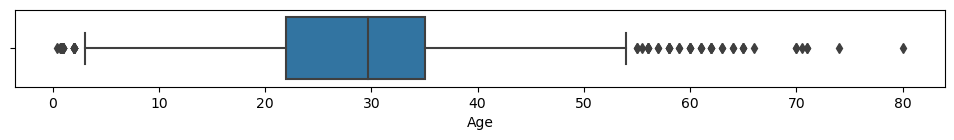

In [170]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='Age',data=df)
plt.show()

# it is the EARLIER (df dataset) PRESENCE OF OUTLIERS

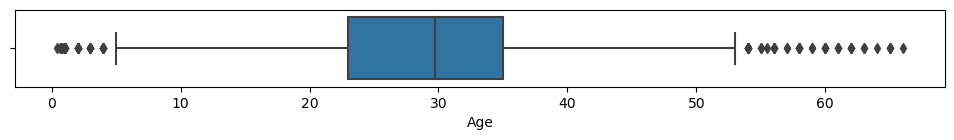

In [172]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='Age',data=df_new)
plt.show()
# AND THIS IS AFTER APLLYING Z-SCORE , you can clearly see the diffrence between earlier one and this
# in earlier one the presence of OUTLIERS is upto - 80, and now it is removed upto - 65 Only
# outliers are removed

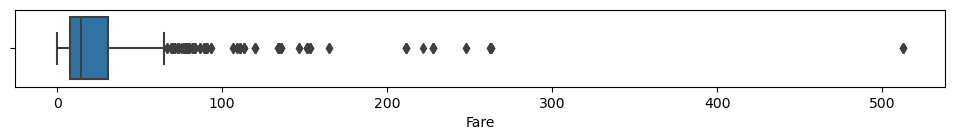

In [173]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='Fare',data=df)
plt.show()

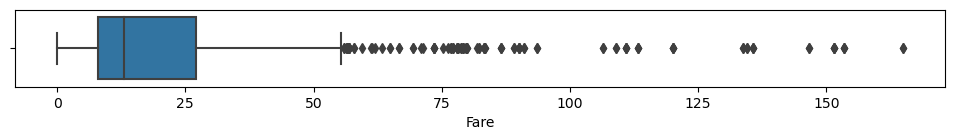

In [174]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='Fare',data=df_new)
plt.show()
# AND THIS IS AFTER APLLYING Z-SCORE , you can clearly see the diffrence between earlier one and this
# in earlier one the presence of OUTLIERS is upto >500, and now it is reduced only upto - 155 to 160
# outliers are removed

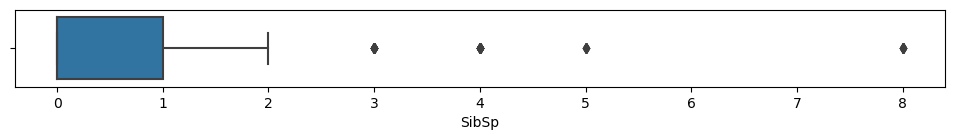

In [175]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='SibSp',data=df)
plt.show()

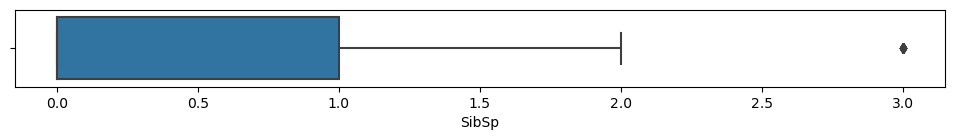

In [176]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='SibSp',data=df_new)
plt.show()
# AND THIS IS AFTER APLLYING Z-SCORE , you can clearly see the diffrence between earlier one and this
# in earlier one the presence of OUTLIERS is upto - 8, now they are reduced upto 3
# those outliers are removed

CHECKING SKEWNESS 
============================================================================================================>>>

In [282]:
# the skewness shows the distribution of data, if the data is widely skewed that means it is not good for our model.
#  ideal range of skewness is ( -0.5 to +0.5)
# We can't remove skewness from our Target Column

In [179]:
df_new.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.318314
SibSp       1.979577
Parch       2.122629
Fare        2.318761
Embarked   -1.277386
dtype: float64

In [ ]:
# Here we can see the skewness in 'Parch', 'Fare' & 'Embarked'
# so we have to remove skewness from those columns by using 'cuberoot' method.

In [180]:
df_new['Parch'] = np.cbrt(df_new['Parch'])

In [181]:
df_new['SibSp'] = np.cbrt(df_new['SibSp'])

In [182]:
df_new['Embarked'] = np.cbrt(df_new['Embarked'])

In [184]:
df_new['Fare'] = np.cbrt(df_new['Fare'])

In [185]:
df_new.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.318314
SibSp       1.018770
Parch       1.643259
Fare        0.708623
Embarked   -1.536414
dtype: float64

In [186]:
# here we can see that the skewness is removed as compared to earler.
#  we can't remove more skewness, there may be chance of huge dataloss.

In [187]:
df_new.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1.0,0.0,1.935438,1.259921
1,1,1,0,38.0,1.0,0.0,4.146318,0.000000
2,1,3,0,26.0,0.0,0.0,1.993730,1.259921
3,1,1,0,35.0,1.0,0.0,3.758647,1.259921
4,0,3,1,35.0,0.0,0.0,2.004158,1.259921


In [188]:
df_new.shape

(820, 8)

In [189]:
df_new.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp       float64
Parch       float64
Fare        float64
Embarked    float64
dtype: object

CHECKING CORRELATION (GRAPHICALLY) ===========================================================================================

In [192]:
# FINDING CORRELATION GRAPHICALLY 

In [194]:
cor = df_new.corr()

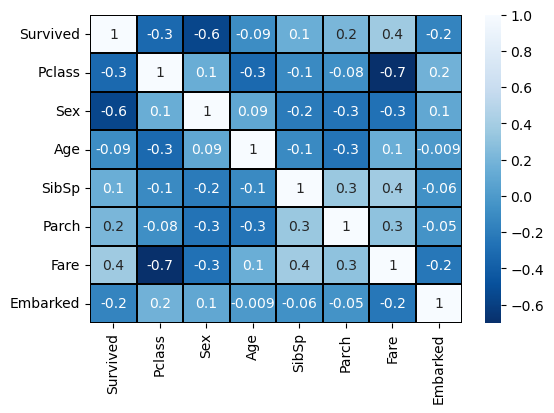

In [195]:
plt.figure (figsize = (6,4), facecolor = "white")
sns.heatmap(df_new.corr(),linewidth=0.1,fmt="0.1g",linecolor="black",annot=True,cmap="Blues_r")
plt.yticks(rotation=0);
plt.show()

# here we can't see that there is such any correlation in between the variables

In [197]:
cor['Survived'].sort_values(ascending=False)
# here we can see in the correltion of all independent vaules with Target Column = 'Survived'
#  there no such any huge correation with target column.

Survived    1.000000
Fare        0.363961
Parch       0.210930
SibSp       0.145722
Age        -0.090926
Embarked   -0.154194
Pclass     -0.322306
Sex        -0.554888
Name: Survived, dtype: float64

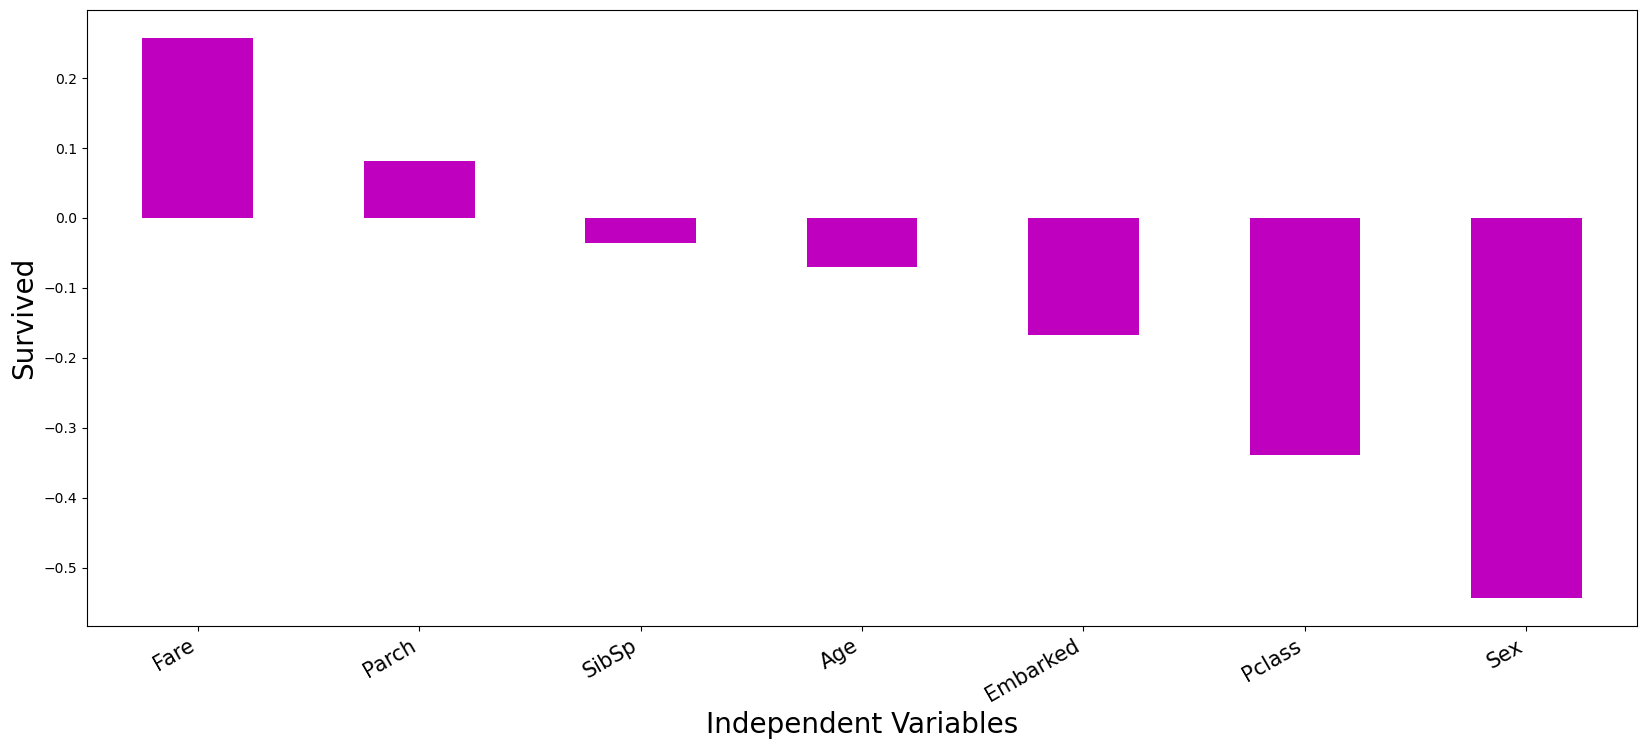

In [198]:
plt.figure(figsize=(20,8))
df.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color="m")
plt.xlabel('Independent Variables',fontsize=20)
plt.xticks(rotation=30,ha='right',fontsize=15)
plt.ylabel('Survived',fontsize =20)
plt.title=("Correlation with Survived")
plt.show()

# here we can see that there no such any positive correlation, insted neagativly correlated independts are more.

DIVIDING DATA INTO INDEPENDENT & TARGET VARIABLE =============================================================================================================================

In [201]:
df_new.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1.0,0.0,1.935438,1.259921
1,1,1,0,38.0,1.0,0.0,4.146318,0.000000


In [202]:
df_new.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [203]:
x = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked']]

In [205]:
y = df[['Survived']]

 APPLYING SCALING TECHNIQUES ==================================================================================================================>>>>>>

In [211]:
# we can't apply SCALING TECHNIQUES on TARGET VARIABLE

In [208]:
from sklearn.preprocessing import StandardScaler

In [209]:
st = StandardScaler()

In [210]:
x = st.fit_transform(x)
x

array([[ 0.82737724,  0.73769513, -0.5924806 , ..., -0.47367361,
        -0.50244517,  0.58595414],
       [-1.56610693, -1.35557354,  0.63878901, ..., -0.47367361,
         0.78684529, -1.9423032 ],
       [ 0.82737724, -1.35557354, -0.2846632 , ..., -0.47367361,
        -0.48885426,  0.58595414],
       ...,
       [ 0.82737724, -1.35557354,  0.        , ...,  2.00893337,
        -0.17626324,  0.58595414],
       [-1.56610693,  0.73769513, -0.2846632 , ..., -0.47367361,
        -0.04438104, -1.9423032 ],
       [ 0.82737724,  0.73769513,  0.17706291, ..., -0.47367361,
        -0.49237783, -0.67817453]])

In [212]:
xf = pd.DataFrame(data=x)
print(xf)

# here we get our dataset (xf) after applying SCALING TECHING (STANDARD SCALER)

            0         1         2         3         4         5         6
0    0.827377  0.737695 -0.592481  0.432793 -0.473674 -0.502445  0.585954
1   -1.566107 -1.355574  0.638789  0.432793 -0.473674  0.786845 -1.942303
2    0.827377 -1.355574 -0.284663 -0.474545 -0.473674 -0.488854  0.585954
3   -1.566107 -1.355574  0.407926  0.432793 -0.473674  0.420730  0.585954
4    0.827377  0.737695  0.407926 -0.474545 -0.473674 -0.486337  0.585954
..        ...       ...       ...       ...       ...       ...       ...
886 -0.369365  0.737695 -0.207709 -0.474545 -0.473674 -0.386671  0.585954
887 -1.566107 -1.355574 -0.823344 -0.474545 -0.473674 -0.044381  0.585954
888  0.827377 -1.355574  0.000000  0.432793  2.008933 -0.176263  0.585954
889 -1.566107  0.737695 -0.284663 -0.474545 -0.473674 -0.044381 -1.942303
890  0.827377  0.737695  0.177063 -0.474545 -0.473674 -0.492378 -0.678175

[891 rows x 7 columns]


In [213]:
df_new.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [214]:
column = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked']

In [215]:
xf.columns = column

In [216]:
xf.head(1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.827377,0.737695,-0.592481,0.432793,-0.473674,-0.502445,0.585954


In [ ]:
# similarly for target column.

In [217]:
yf = y

In [221]:
yf.head(2)

,Survived
0,0
1,1


FINDING MULTICOLINEARITY ======================================================================================================================

In [223]:
# We have to find the multicollinearity between the features and to remove it we can use VIF (VARIANCE INFLATION FACTOR)
# we can not apply VIF on the TARGET COLUMN
# for apllyin VIF we have to import some libraries as follows

In [224]:
import statsmodels.api as sm
from scipy import stats
from statsmodels .stats.outliers_influence import variance_inflation_factor

In [225]:
# here we are making "def function" for calculating VIF
def calc_vif(xf):
    vif = pd.DataFrame()
    vif["FETURES"] = xf.columns
    vif["VIF FACTOR"] = [variance_inflation_factor(xf.values,i) for i in range (xf.shape[1])]
    return (vif)

In [226]:
xf.shape

(891, 7)

In [227]:
yf.shape

(891, 1)

In [229]:
calc_vif(xf)
# here we didn't find MULTICOLINEARITY between the independent Columns.

,FETURES,VIF FACTOR
0,Pclass,1.671580
1,Sex,1.108869
2,Age,1.205639
3,SibSp,1.282325
4,Parch,1.322550
5,Fare,1.648696
6,Embarked,1.079324


RESAMPLING (SMOTE) ========================================================================================================

In [239]:
xf.shape

(891, 7)

In [240]:
yf.shape

(891, 1)

In [233]:
yf.value_counts()

Survived
0           549
1           342
dtype: int64

In [235]:
#  here above we can see that the distribution of values with the unique number is very irregular,  therfore we have to make them
#  equal by using RESAMPLING TECHNIQUE.

In [236]:
from imblearn.over_sampling import SMOTE

In [237]:
smt = SMOTE()

In [241]:
trainx, trainy = smt.fit_resample(xf,yf)

In [242]:
trainy.value_counts()
# here as you can see below the immbalancenes is cleared now.

Survived
0           549
1           549
dtype: int64

In [245]:
trainx.shape

(1098, 7)

In [246]:
trainy.shape

(1098, 1)

In [247]:
# here above we can see that, we appied SMOTE SUCCEFULLY ON THE DATASET,
# and BALANCE the dataset

FINDING THE BEST RANDOM STATE FOR THE MODEL ===================================================================================

APPLYING TRAIN TEST SPLIT =============================================================================================================

In [249]:
# here we can see that out Target Column - 'SURVIVED' is categorical column.
# we can aplly Multiple ML Model and test the prediction.

In [231]:
from sklearn.model_selection import train_test_split

In [250]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [251]:
from sklearn.tree import DecisionTreeClassifier

In [252]:
dtc = DecisionTreeClassifier

In [253]:
maxaccu = 0
maxrs = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(trainx,trainy,test_size=0.20,random_state=i)
    dtc = DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    pred = dtc.predict(x_test)
    acc = accuracy_score(y_test,pred)
    
    if acc > maxaccu :
        maxaccu = acc
        maxrs = i
        
print ("Best accuracy is",maxaccu, "at random state", maxrs)

Best accuracy is 0.8636363636363636 at random state 193


In [ ]:
# here above we can find the MAXIMUM ACCURACY of 86% is occurs on random state= 193

FINDING BEST PERAMETERS WITH GRIDSEARCH CV =====================================================================================

In [255]:
from sklearn.model_selection import GridSearchCV

In [256]:
grid_param = {'criterion':['gini','entropy']}

In [257]:
gd_sr = GridSearchCV (estimator=dtc, param_grid= grid_param, scoring="accuracy",cv=5)

In [258]:
gd_sr.fit(trainx,trainy)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy']}, scoring='accuracy')

In [259]:
best_perameter = gd_sr.best_params_
print(best_perameter)

{'criterion': 'entropy'}


In [261]:
# here we can find the best perameter for the model is "entropy"

In [262]:
best_result = gd_sr.best_score_
print(best_result)

0.806068908260689


In [263]:
print(round(best_result,2))

0.81


In [264]:
#  the best score is .81

In [265]:
# now applying the model with "entropy" parameter and "193" randomstate

In [276]:
final_model = DecisionTreeClassifier (criterion="entropy")

In [267]:
 x_train,x_test,y_train,y_test = train_test_split(xf,yf,test_size=0.20,random_state=193)

In [277]:
final_model.fit(x_train,y_train)
final_model.score(x_train,y_train)
final_model_pred = final_model.predict(x_test)
print(accuracy_score(y_test,final_model_pred))
print(confusion_matrix(y_test,final_model_pred))
print(classification_report(y_test,final_model_pred))

0.770949720670391
[[89 15]
 [26 49]]
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       104
           1       0.77      0.65      0.71        75

    accuracy                           0.77       179
   macro avg       0.77      0.75      0.76       179
weighted avg       0.77      0.77      0.77       179



In [ ]:
# here above we can see that the accuracy of our model is = 81%

CREATING FUNCTION TO PREDICT ==================================================================================================

In [273]:
def pred_func(s):
    s= s.reshape(1,7)
    st = dtc1.predict(s)
    print(st)
    
    if st == 0:
        print("not survived")
    elif (st == 1):
        print ("survived")

In [274]:
s= np.array([0.827377,0.737695,-0.592481,0.432793,-0.473674,-0.502445,0.585954])
pred_func(s)

[0]
not survived


SAVING MODEL ===================================================================================================================

In [279]:
import pickle

In [280]:
file_name = 'titanic_prediction.pkl' 
pickle.dump(final_model,open(file_name,'wb'))

========================================  FINISHED ================================================